### Stackup Bounty Project - Sentimental analysis of tweets

In [3]:
# import the library for scraping tweets
from ntscraper import Nitter

In [4]:
# initialise the scraper
scraper = Nitter()

Testing instances: 100%|████████████████████████████████████████████████████████████████████████████| 30/30 [01:30<00:00,  3.02s/it]


In [5]:
# scrape for tweets with the search term - 'globalwarming' used as a hashtag, setting the number of tweets to be fetched at 400 and also
# excluding tweets with only links or media
tweets_dict = scraper.get_tweets("globalwarming", mode="hashtag", number=400,exclude=["links", "media"])
list_tweets = []

# iterate through the tweets inside the 'tweets_dict' dictionary and add them to 'list_tweets' list
for tweet in tweets_dict['tweets']:
    list_tweets.append(tweet['text'])


05-Jan-24 20:40:37 - No instance specified, using random instance https://nitter.mint.lgbt
05-Jan-24 20:40:46 - Current stats for globalwarming: 15 tweets, 0 threads...
05-Jan-24 20:40:50 - Current stats for globalwarming: 18 tweets, 0 threads...
05-Jan-24 20:40:54 - Current stats for globalwarming: 20 tweets, 0 threads...
05-Jan-24 20:40:59 - Current stats for globalwarming: 35 tweets, 0 threads...
05-Jan-24 20:41:04 - Current stats for globalwarming: 50 tweets, 0 threads...
05-Jan-24 20:41:08 - Current stats for globalwarming: 65 tweets, 0 threads...
05-Jan-24 20:41:13 - Current stats for globalwarming: 78 tweets, 0 threads...
05-Jan-24 20:41:17 - Current stats for globalwarming: 88 tweets, 0 threads...
05-Jan-24 20:41:22 - Current stats for globalwarming: 97 tweets, 0 threads...
05-Jan-24 20:41:27 - Current stats for globalwarming: 111 tweets, 0 threads...
05-Jan-24 20:41:31 - Current stats for globalwarming: 125 tweets, 0 threads...
05-Jan-24 20:41:35 - Current stats for globalwarm

In [6]:
# importing library for regex operations
import re

# Function to check if text is in English (ASCII check)
def is_english(text):
    try:
        text.encode('ascii')
        return True  # Text is in ASCII (likely English)
    except UnicodeEncodeError:
        return False  # Text contains non-ASCII characters (likely non-English or contains symbols or emojis)

# Function to remove URLs from text
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
    
# Use regular expression to remove words starting with '#'
def remove_hashtags(tweet):
    cleaned_tweet = re.sub(r'\#\w+', '', tweet)
    return cleaned_tweet

cleaned_tweets = []
# Loop through tweets and filter non-English tweets, urls and hashtags
for tweet in list_tweets:
    # checking if tweet is in english
    if is_english(tweet):
        cleaned_url_tweet = remove_urls(tweet)
        cleaned_tweet = remove_hashtags(cleaned_url_tweet)
        # don't add tweets which are empty after cleaning
        if cleaned_tweet=="" or cleaned_tweet.isspace(): 
            continue
        # add valid clean tweets to the cleaned_tweets list
        cleaned_tweets.append(cleaned_tweet)
        # cleaned_tweets_date.append(tweet["date"])
print(len(cleaned_tweets))

224


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Tokenization function
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# function for Removing Stopwords and Punctuation 
def remove_stopwords_and_punctuation(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_tokens

# Sentiment Analysis function, returns a list of dictionary with keys pos,neg,neu and compound
def analyze_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(tweet)
    return sentiment_scores

# Apply Sentiment Analysis to Tweets in the cleaned_tweets list
sentiment_scores_list=[] 
for tweet in cleaned_tweets:
    # Tokenization
    tokens = tokenize_text(tweet)
    
    # Remove Stopwords and Punctuation
    filtered_tokens = remove_stopwords_and_punctuation(tokens)

    # Sentiment Analysis
    sentiment_score = analyze_sentiment(' '.join(filtered_tokens))
    sentiment_scores_list.append(sentiment_score)


In [24]:
# import matplotlib library to draw visualisations
import matplotlib.pyplot as plt

# Extract compound scores
compound_scores = [score['compound'] for score in sentiment_scores_list]

# Classify compound scores into positive, neutral, and negative
positive_scores = []
neutral_scores = []
negative_scores = []
for score in compound_scores:
    if score>0.05:
        positive_scores.append(score)
    elif score<-0.05:
        negative_scores.append(score)
    else:
        neutral_scores.append(score)

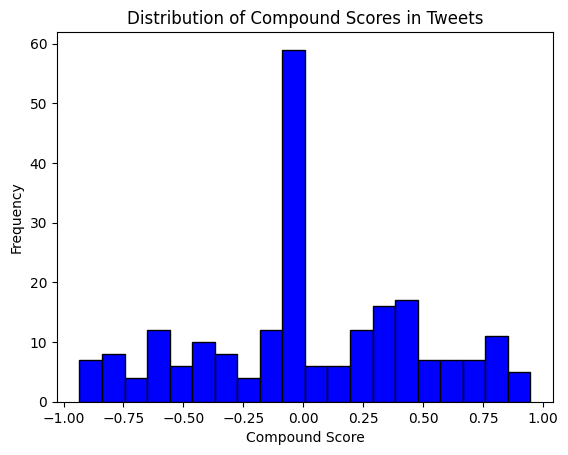

In [25]:
# Plot a histogram
plt.hist(compound_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Scores in Tweets')
plt.show()

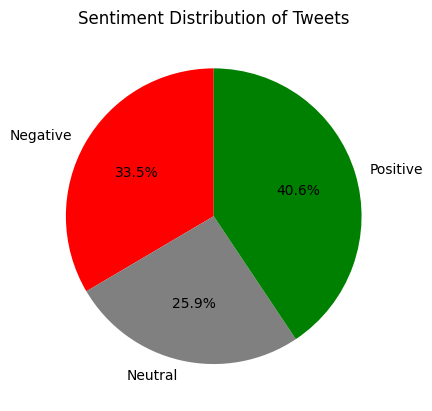

In [26]:
# Plot a pie chart
labels = ['Negative', 'Neutral', 'Positive']
sizes = [len(negative_scores), len(neutral_scores), len(positive_scores)]
colors = ['red', 'gray', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution of Tweets')
plt.show()

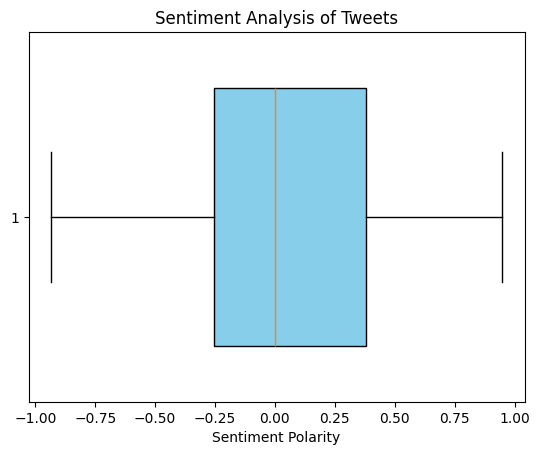

In [28]:

# Visualize Sentiment Distribution with Boxplot
plt.boxplot(compound_scores, vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Sentiment Polarity')
plt.title('Sentiment Analysis of Tweets')
plt.show()

### Sentimental analysis of Tweets - Bounty Project
This Jupyter notebook aims to analyze tweets related to the hashtag '#globalwarming' using web scraping, text processing, and sentiment analysis techniques. Various techniques have been used to get the final visualisations from raw tweet data. 

**Web Scraping with Nitter:** The ntscraper library is used to fetch 400 tweets containing the hashtag 'globalwarming' from Nitter (an alternative front end for Twitter). Since we are interested in only the tweets that contain text, the tweets are filtered to exclude those with only links or media. But still there may be urls and image links imbedded in the tweet text itself, which will be dealt with later.
The *search_term* can be modified as well as the mode of search(can be a search for a hashtag as it is in this notebook, or a search for the term itself in all tweets or can be a username to get all tweets of that user), the number of tweets to be fetched and there are options to include or exclude certain filters like links or media. The tweets can also be fetched with a range of dates passed to it. Sometimes I had to rerun the command to get a better instance to do the scraping or the search returns empty page for the search term, but for most of the terms it worked fine. We get a dictionary with all the tweets and its related data as the output of the scraping, we are only interested in the text from the tweets which are extracted and stored in a list called list_tweets.

**Text Cleaning:** The 're' library is used for regex operations in this step. The tweets from 'list_tweets' are then processed to remove non-English tweets, URLs, and hashtags.
The 'is_english()' function checks if the tweet is in English by checking if all the characters are ASCII characters. The remove_urls function eliminates URLs, and remove_hashtags removes words starting with '#'.Finally, it is checked whether the tweet is empty after all this operations, if so , it is not taken for analysis. Then the tweets are added to a new list called cleaned_tweets. The number of remaining tweets after cleaning is then printed out.

**Sentiment Analysis:** The Natural Language Toolkit (NLTK) library is employed for tokenization, stopword removal, and sentiment analysis using the VADER model. The sentiment scores (positive, negative, neutral, and compound) for each cleaned tweet are calculated and stored inside a list called sentiment_scores_list.

**Visualization:** The distribution of compound sentiment scores is visualized first using a histogram. Compound scores > 0.05 are considered positive, scores < -0.05 are negative, and the rest are considered neutral. We use the scores in the sentiment_scores_list and apply the condition just mentioned to sort the values into three lists - positive_scores, negative_scores and neutral_scores and then use those lists to plot the histogram.

Next, is a pie chart to show the overall percentage of negative, positive and neutral opinions. It is simple yet very direct and easy to understand the general opinion on the topic.

The last visualisation is a box plot which helps to understand how the scores are distributed. The Median, the maximum and minimum values, as well as the 25th and 75th percentile values can be understood from a glance of this plot which makes it quite easy to form a picture of the whole distribution of sentimental scores.

The project provides insights into the sentiment surrounding the '#globalwarming' hashtag on Twitter, helping to understand public opinion on this environmental issue. The sentiment analysis and visualization offer a quick overview of the sentiments expressed in the collected tweets, providing a snapshot of the online discourse on global warming.
